### This script contains the following:

#### 1. Importing libraries and data
#### 2. Grouping into new columns and EDA

In [1]:
# 01 Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
## 02 Importing cleaned and enhanced csv as a dataframe, named "df"
df = pd.read_csv('/Users/emmawilcox/Desktop/camper_clean_distance.csv', index_col=False, low_memory=False)

In [3]:
## 03 Looking at df
df.head()

,Unnamed: 0.1,Unnamed: 0,ordernumber,agency,orgid,regioncode,regiondescription,parentlocationid,parentlocation,park,...,startdate,enddate,orderdate,nights,numberofpeople,equipmentdescription,clean_startdate,clean_enddate,customerstate,distance
0,0,1488,0343383462-1,BLM,126,AZ,Arizona,16669,Kingman Field Office,Burro Creek Campground,...,2021-11-11T00:00:00Z,2021-11-16T00:00:00Z,2021-09-08T02:10:33.470611Z,5,12,Trailer,2021-11-11,2021-11-16,AZ,122.820784
1,1,1492,0400231814-1,BLM,126,AZ,Arizona,16669,Kingman Field Office,Burro Creek Campground,...,2022-03-18T00:00:00Z,2022-03-20T00:00:00Z,2022-02-06T01:38:16.919819Z,2,4,Fifth Wheel,2022-03-18,2022-03-20,AZ,56.785258
2,2,1504,0404840886-1,BLM,126,AZ,Arizona,16669,Kingman Field Office,Burro Creek Campground,...,2022-03-11T00:00:00Z,2022-03-13T00:00:00Z,2021-11-09T01:31:10.500458Z,2,12,Trailer,2022-03-11,2022-03-13,AZ,103.583200
3,3,1525,0410136112-1,BLM,126,AZ,Arizona,16669,Kingman Field Office,Burro Creek Campground,...,2022-01-09T00:00:00Z,2022-01-10T00:00:00Z,2021-12-12T22:17:51.124814Z,1,6,RV,2022-01-09,2022-01-10,MT,809.033807
4,4,1546,0416249892-1,BLM,126,AZ,Arizona,16669,Kingman Field Office,Burro Creek Campground,...,2022-02-18T00:00:00Z,2022-02-21T00:00:00Z,2022-01-05T17:24:17.047159Z,3,12,Fifth Wheel,2022-02-18,2022-02-21,AZ,71.057958


In [4]:
## 04 Looking at customer state distribution
df['customerstate'].value_counts(dropna=False)

CA     179972
TX     160175
AR      94441
CO      85176
MO      79066
GA      67295
OR      66461
TN      61200
FL      59934
WA      58582
OK      53039
KY      52469
IL      48414
UT      48222
KS      44251
AZ      41753
IA      41448
NC      36751
AL      32774
MS      29012
NV      27141
PA      26237
MT      25830
VA      24581
MN      24072
ID      23770
SC      22639
MI      20724
WI      17203
OH      16326
NM      12968
NaN     12516
SD      12004
NY      11245
IN      10774
WV      10505
LA       9012
AK       7378
NE       7247
MD       7209
WY       7124
ND       6668
MA       5139
NJ       3583
ME       2572
NH       2410
CT       1991
VT       1752
HI       1138
DE        961
DC        773
RI        759
VI         84
AP         57
PR         51
AE         46
GU         10
AA          3
Name: customerstate, dtype: int64

In [6]:
## 05 Create a dictionary to map state abbreviations to full names
state_abbrev_to_full = {
    'CA': 'California',
    'TX': 'Texas',
    'AR': 'Arkansas',
    'CO': 'Colorado',
    'MO': 'Missouri',
    'GA': 'Georgia',
    'OR': 'Oregon',
    'TN': 'Tennessee',
    'FL': 'Florida',
    'WA': 'Washington',
    'OK': 'Oklahoma',
    'KY': 'Kentucky',
    'IL': 'Illinois',
    'UT': 'Utah',
    'KS': 'Kansas',
    'AZ': 'Arizona',
    'IA': 'Iowa',
    'NC': 'North Carolina',
    'AL': 'Alabama',
    'MS': 'Mississippi',
    'NV': 'Nevada',
    'PA': 'Pennsylvania',
    'MT': 'Montana',
    'VA': 'Virginia',
    'MN': 'Minnesota',
    'ID': 'Idaho',
    'SC': 'South Carolina',
    'MI': 'Michigan',
    'WI': 'Wisconsin',
    'OH': 'Ohio',
    'NM': 'New Mexico',
    'SD': 'South Dakota',
    'NY': 'New York',
    'IN': 'Indiana',
    'WV': 'West Virginia',
    'LA': 'Louisiana',
    'AK': 'Alaska',
    'NE': 'Nebraska',
    'MD': 'Maryland',
    'WY': 'Wyoming',
    'ND': 'North Dakota',
    'MA': 'Massachusetts',
    'NJ': 'New Jersey',
    'ME': 'Maine',
    'NH': 'New Hampshire',
    'CT': 'Connecticut',
    'VT': 'Vermont',
    'HI': 'Hawaii',
    'DE': 'Delaware',
    'DC': 'District of Columbia',
    'RI': 'Rhode Island',
    'VI': 'Virgin Islands',
    'AP': 'Armed Forces Pacific',
    'PR': 'Puerto Rico',
    'AE': 'Armed Forces Europe, Africa, and Canada',
    'GU': 'Guam',
    'AA': 'Armed Forces Americas',
}

# Use the map function to apply the mapping to the 'state' column
df['customerstate_full'] = df['customerstate'].map(state_abbrev_to_full)


In [7]:
## 06 Looking at df with new column that matches format of facility state
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704937 entries, 0 to 1704936
Data columns (total 34 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0.1          int64  
 1   Unnamed: 0            int64  
 2   ordernumber           object 
 3   agency                object 
 4   orgid                 int64  
 5   regioncode            object 
 6   regiondescription     object 
 7   parentlocationid      object 
 8   parentlocation        object 
 9   park                  object 
 10  sitetype              object 
 11  usetype               object 
 12  productid             int64  
 13  inventorytype         object 
 14  facilityid            int64  
 15  facilityzip           int64  
 16  facilitystate         object 
 17  facilitylongitude     float64
 18  facilitylatitude      float64
 19  customerzip           int64  
 20  totalbeforetax        float64
 21  discount              float64
 22  totalpaid             float64
 23  startda

In [8]:
## 07 Looking at some sample rows
df.head()

,Unnamed: 0.1,Unnamed: 0,ordernumber,agency,orgid,regioncode,regiondescription,parentlocationid,parentlocation,park,...,enddate,orderdate,nights,numberofpeople,equipmentdescription,clean_startdate,clean_enddate,customerstate,distance,customerstate_full
0,0,1488,0343383462-1,BLM,126,AZ,Arizona,16669,Kingman Field Office,Burro Creek Campground,...,2021-11-16T00:00:00Z,2021-09-08T02:10:33.470611Z,5,12,Trailer,2021-11-11,2021-11-16,AZ,122.820784,Arizona
1,1,1492,0400231814-1,BLM,126,AZ,Arizona,16669,Kingman Field Office,Burro Creek Campground,...,2022-03-20T00:00:00Z,2022-02-06T01:38:16.919819Z,2,4,Fifth Wheel,2022-03-18,2022-03-20,AZ,56.785258,Arizona
2,2,1504,0404840886-1,BLM,126,AZ,Arizona,16669,Kingman Field Office,Burro Creek Campground,...,2022-03-13T00:00:00Z,2021-11-09T01:31:10.500458Z,2,12,Trailer,2022-03-11,2022-03-13,AZ,103.583200,Arizona
3,3,1525,0410136112-1,BLM,126,AZ,Arizona,16669,Kingman Field Office,Burro Creek Campground,...,2022-01-10T00:00:00Z,2021-12-12T22:17:51.124814Z,1,6,RV,2022-01-09,2022-01-10,MT,809.033807,Montana
4,4,1546,0416249892-1,BLM,126,AZ,Arizona,16669,Kingman Field Office,Burro Creek Campground,...,2022-02-21T00:00:00Z,2022-01-05T17:24:17.047159Z,3,12,Fifth Wheel,2022-02-18,2022-02-21,AZ,71.057958,Arizona


In [9]:
##08 Checking for mixed type columns
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

customerstate
customerstate_full


In [10]:
##09 Using .drop to remove unwanted columns
df.drop(columns = {'Unnamed: 0.1', 'Unnamed: 0', 'ordernumber', 'orgid', 'startdate', 'enddate', 'orderdate', 'totalpaid', 'discount', 'productid', 'parentlocationid' }, inplace = True)

In [11]:
## 10 Looking at df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704937 entries, 0 to 1704936
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   agency                object 
 1   regioncode            object 
 2   regiondescription     object 
 3   parentlocation        object 
 4   park                  object 
 5   sitetype              object 
 6   usetype               object 
 7   inventorytype         object 
 8   facilityid            int64  
 9   facilityzip           int64  
 10  facilitystate         object 
 11  facilitylongitude     float64
 12  facilitylatitude      float64
 13  customerzip           int64  
 14  totalbeforetax        float64
 15  nights                int64  
 16  numberofpeople        int64  
 17  equipmentdescription  object 
 18  clean_startdate       object 
 19  clean_enddate         object 
 20  customerstate         object 
 21  distance              float64
 22  customerstate_full    object 
dtypes: floa

In [12]:
## 11 Looking at group sizes 
pd.set_option('display.max_rows', None)
df['numberofpeople'].value_counts(dropna=False)

2      798304
4      263913
3      136607
6      132128
1      130620
5       95822
8       89102
10      18833
7       14921
12       5381
16       2873
20       2351
9        2180
15       1692
25       1540
30       1403
50       1378
40        963
11        489
100       441
14        428
35        329
60        317
24        302
13        286
75        284
18        205
80        189
45        162
70        117
32        103
22         94
17         87
150        78
21         75
26         67
28         53
48         52
36         50
19         46
65         43
23         39
125        39
200        38
55         34
27         31
90         30
56         25
29         24
49         23
120        23
31         20
96         19
110        18
38         17
39         14
64         13
99         12
95         11
250        10
72         10
41         10
34         10
85          9
37          9
33          9
42          9
84          8
130         8
160         8
43          7
47    

In [ ]:
## 12 Removing some US territories
valueae = 'AE'
valuepr = 'PR'
valueaa = 'AA'
valueap = 'AP'
valuevi = 'VI'
valuegu = 'GU'

In [6]:
## 13 Removal to create just contigious plus AK and HI
df = df[(df['customerstate'] != valueae) & (df['customerstate'] != valuepr) & (df['customerstate'] != valueaa) & (df['customerstate'] != valueap) & (df['customerstate'] != valuevi) & (df['customerstate'] != valuegu)]

In [8]:
## 14 Removal confirmed
df['customerstate'].value_counts(dropna = False)

CA     179972
TX     160175
AR      94441
CO      85176
MO      79066
GA      67295
OR      66461
TN      61200
FL      59934
WA      58582
OK      53039
KY      52469
IL      48414
UT      48222
KS      44251
AZ      41753
IA      41448
NC      36751
AL      32774
MS      29012
NV      27141
PA      26237
MT      25830
VA      24581
MN      24072
ID      23770
SC      22639
MI      20724
WI      17203
OH      16326
NM      12968
NaN     12516
SD      12004
NY      11245
IN      10774
WV      10505
LA       9012
AK       7378
NE       7247
MD       7209
WY       7124
ND       6668
MA       5139
NJ       3583
ME       2572
NH       2410
CT       1991
VT       1752
HI       1138
DE        961
DC        773
RI        759
Name: customerstate, dtype: int64

<AxesSubplot:xlabel='numberofpeople', ylabel='Count'>

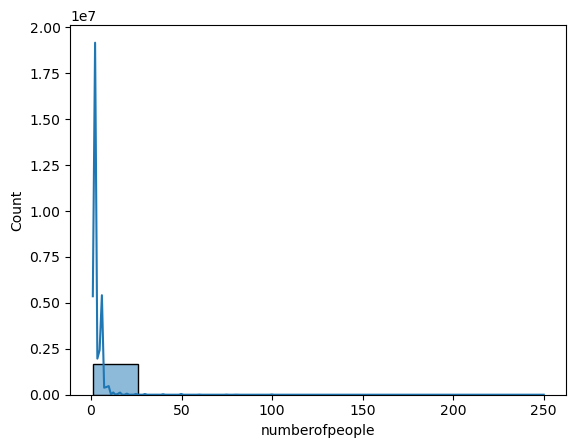

In [9]:
## 15 Looking at distribution of numbers of people in reservation groups
sns.histplot(df['numberofpeople'], bins=10, kde = True)

#### 2. Grouping into new columns and EDA

In [10]:
## 16 Part 1 of grouping "numberofpeople"
df.loc[df['numberofpeople'] <= 2, 'Size of Group'] = 'Smallest Group'

In [11]:
## 17 Part 2 of grouping "numbersof people" 
df.loc[(df['numberofpeople'] >=3 ) & (df['numberofpeople'] <=6), 'Size of Group'] = 'Small Group'

In [12]:
## 18 Part 3 of grouping "numbersof people" 
df.loc[(df['numberofpeople'] >=7 ) & (df['numberofpeople'] <=15), 'Size of Group'] = 'Medium Group'

In [13]:
## 19 Part 4 of grouping "numbersof people" 
df.loc[(df['numberofpeople'] >=16 ) & (df['numberofpeople'] <=50), 'Size of Group'] = 'Large Group'

In [15]:
## 20 Part 4 of grouping "numbersof people" 
df.loc[df['numberofpeople'] >= 51, 'Size of Group'] = 'Huge Group'

In [16]:
## 21 Looking at distribution
df['Size of Group'].value_counts(dropna=True)

Smallest Group    928753
Small Group       628393
Medium Group      133309
Large Group        12369
Huge Group          1862
Name: Size of Group, dtype: int64

In [18]:
## 22 Get the value counts of the 'Size of Group' column
group_counts = df['Size of Group'].value_counts(dropna=True)

# Calculate the total number of rows in the DataFrame
total_rows = len(df)

# Calculate the percentages for each group
percentages = (group_counts / total_rows) * 100

# Print the percentages
print(percentages)

Smallest Group    54.482350
Small Group       36.862683
Medium Group       7.820150
Large Group        0.725588
Huge Group         0.109228
Name: Size of Group, dtype: float64


Rv users travel in groups of varying sizes, with 54% of reservations indicating 1-2 people, suggesting a single traveller, or perhaps a couple, or two friends travelling together. 37% of Rv users are in groups of 3-6, suggesting the capacity of many Rvs for family or group use. 

8% of Rv users are in groups of 7-15 people, and while this is a small, minority segment in existent usage patterns, there could be ROI with some test marketing focused on cohorts of people travelling together with mulitple Rvs, caravan-style.

In [26]:
## 23 There are going to be instances where distance is calculated as zero because customer stayed in their home zip code for park use
sample_data = df[['facilityzip', 'customerzip']].head()
print(sample_data)

   facilityzip  customerzip
0        85360        85339
1        85360        86303
2        85360        85363
3        85360        59634
4        85360        86442


<AxesSubplot:xlabel='distance', ylabel='Count'>

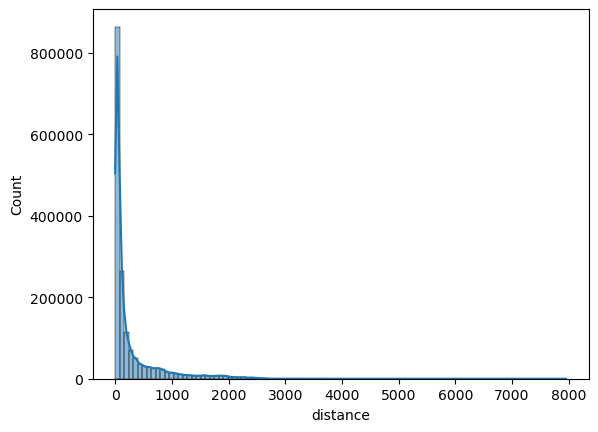

In [27]:
## 24 Looking at distribution of distances
sns.histplot(df['distance'], bins=100, kde = True)

In [28]:
## 25 Looking at some nans in distance column
df['distance'].value_counts(dropna=False)

0.000000       47570
NaN            12516
22.162265       1163
7.012113        1028
6.222258         987
               ...  
321.401599         1
930.423015         1
831.721451         1
639.895503         1
1030.613655        1
Name: distance, Length: 434126, dtype: int64

In [29]:
## 26 Confirming number of nans
df_missing = df [df['distance'].isnull() == True]

In [30]:
## 27 There are 12, 516 nans
df_missing.shape

(12516, 35)

In [31]:
## 28 Looking at in-zip code travel, some sample rows
df_0 = df[df['distance'] == 0.000000]

In [32]:
## 29 They seem entirely plausible
df_0.head()

,Unnamed: 0.1,Unnamed: 0,ordernumber,agency,orgid,regioncode,regiondescription,parentlocationid,parentlocation,park,...,orderdate,nights,numberofpeople,equipmentdescription,clean_startdate,clean_enddate,customerstate,distance,Size of Group,Driving Distance
3705,3705,191360,0313896951-1,BLM,126,MT,Montana,10008691,Hauser Lake,White Sandy Campground,...,2021-06-20T16:47:40.085965Z,2,50,Fifth Wheel,2022-06-18,2022-06-20,MT,0.0,Large Group,Local Driving
3707,3707,191363,0396229150-1,BLM,126,MT,Montana,10008691,Hauser Lake,White Sandy Campground,...,2021-06-26T02:03:43.352754Z,5,50,Trailer,2022-06-20,2022-06-25,MT,0.0,Large Group,Local Driving
3708,3708,191364,0400042502-1,BLM,126,MT,Montana,10008691,Hauser Lake,White Sandy Campground,...,2021-12-11T15:19:39.342278Z,1,4,RV,2022-06-11,2022-06-12,MT,0.0,Small Group,Local Driving
3716,3716,191377,0401739775-1,BLM,126,MT,Montana,10008691,Hauser Lake,White Sandy Campground,...,2022-01-08T21:59:49.861497Z,3,4,Fifth Wheel,2022-06-02,2022-06-05,MT,0.0,Small Group,Local Driving
3718,3718,191384,0401935791-1,BLM,126,MT,Montana,10008691,Hauser Lake,White Sandy Campground,...,2022-03-10T04:19:52.752356Z,4,4,Trailer,2022-08-15,2022-08-19,MT,0.0,Small Group,Local Driving


In [33]:
## 30 Removing 12,516 nulls
df = df [df['distance'].isnull() == False]

In [34]:
## 31 Looking at actual distribution
df['distance'].value_counts(dropna=False)

0.000000       47570
22.162265       1163
7.012113        1028
6.222258         987
30.103968        949
               ...  
321.401599         1
930.423015         1
831.721451         1
639.895503         1
1030.613655        1
Name: distance, Length: 434125, dtype: int64

<AxesSubplot:xlabel='distance', ylabel='Count'>

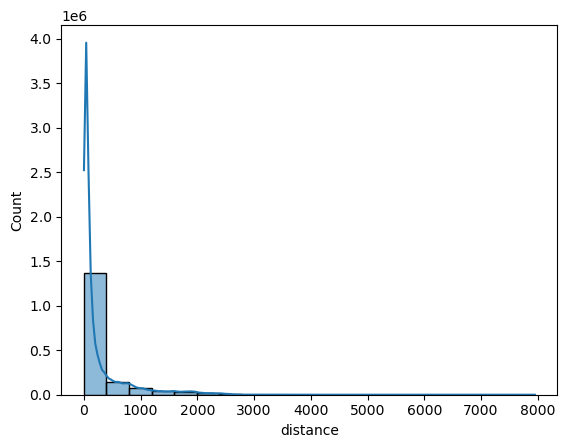

In [35]:
## 32 Looking at histogram of distances, most trips are under 1000 miles
sns.histplot(df['distance'], bins=20, kde = True)

In [36]:
## 33 Final look at all distance values
crosstab_distance = pd.crosstab(df['distance'], df['numberofpeople'], dropna = False)
crosstab_distance.to_clipboard()

In [37]:
## 34 Part 1 of grouping "distance
df.loc[df['distance'] <= 50, 'Driving Distance'] = 'Local Driving'

In [38]:
## 35 Part 2 of grouping "distance
df.loc[(df['distance'] > 50 ) & (df['distance'] <=200), 'Driving Distance'] = 'Half Day Drive'

In [39]:
## 36 Part 3 of grouping "distance
df.loc[(df['distance'] > 200 ) & (df['distance'] <=500), 'Driving Distance'] = 'Full Day Drive'

In [40]:
## 37 Part 4 of grouping "distance
df.loc[(df['distance'] > 500 ) & (df['distance'] <=1500), 'Driving Distance'] = '2-3 Day Drive'

In [41]:
##38 Part 5 of grouping "numberofpeople"
df.loc[df['distance'] > 1500, 'Driving Distance'] = '4+ Day Drive'

In [42]:
## 39 Looking at range of driving distances
df['Driving Distance'].value_counts(dropna=False)

Local Driving     636883
Half Day Drive    557779
Full Day Drive    214406
2-3 Day Drive     210647
4+ Day Drive       72455
Name: Driving Distance, dtype: int64

In [43]:
## 40 Looking at size of df
df.shape

(1692170, 35)

In [44]:
## 41 Local driving
percentage = (636883 / 1692421) * 100
print(percentage)

37.63147585618472


In [45]:
## 42 Full day driving
percentage = (214406 / 1692421) * 100
print(percentage)

12.668597234376081


In [46]:
## 43 2-3 day drive
percentage = (210656 / 1692421) * 100
print(percentage)

12.447021160810461


In [47]:
## 44 4+ day drive
percentage = (72697 / 1692421) * 100
print(percentage)

4.295444218666631


In [48]:
## 45 Half day drive
percentage = (557779 / 1692421) * 100
print(percentage)

32.9574615299621


37% of Rv users are travelling to campgrounds within an hours drive (50 miles) of their home. 32% of Rv users are travelling half a day's drive from home (50-200 miles). So almost 70% of users are travelling within a half-day's drive or less from home.

12% of Rv users are travelling to campgrounds that take 2-3 days to get to (500-1500 miles from home). 12% of Rv users are travelling to campgrounds that take 1 full days to get to (200-500 miles from home). 

4% are travelling 4 or more days (1500+ miles from home) to get to a campground. 

So about 24% of Rv users are travelling 1-3 days one-way (meaning a 2-6 day roundtrip) to get to campgrounds!

It is worth noting that these trip length estimates do not fully convey the experiences of customers who are travelling from campground to campground for extended periods.

In [49]:
## 46 Grouping totalpaid into three ranges, considering that $10 campground fees are common

result1 = []

for value in df['totalbeforetax']:
    if value in range(0, 50):
        result1.append('Low-Cost')
    elif value in range(51, 250):
        result1.append('Mid-Cost')
    else:
        result1.append('High-Cost')

df['Cost Range'] = result1


In [50]:
## 47 Seeing the expected ranges
df['Cost Range'].value_counts(dropna = True)

Low-Cost     856300
Mid-Cost     746980
High-Cost     88890
Name: Cost Range, dtype: int64

In [51]:
## 48 Getting percentages of cost ranges
# Get the value counts of the 'Size of Group' column
group_counts = df['Cost Range'].value_counts(dropna=True)

# Calculate the total number of rows in the DataFrame
total_rows = len(df)

# Calculate the percentages for each group
percentages = (group_counts / total_rows) * 100

# Print the percentages
print(percentages)

Low-Cost     50.603663
Mid-Cost     44.143319
High-Cost     5.253018
Name: Cost Range, dtype: float64


50% of Rv users are paying $50 or less, but nearly half of customers (44%), are paying $50-$250 for their stay.

In [52]:
## 49 Grouping length of stay

df.loc[(df['nights'] >= 0 ) & (df['nights'] <=3), 'Length of Stay'] = 'A Few Days or Less'
df.loc[(df['nights'] >= 4 ) & (df['nights'] <=6), 'Length of Stay'] = 'Under a Week'
df.loc[(df['nights'] == 7 ), 'Length of Stay'] = 'A Weeklong Stay'
df.loc[(df['nights'] > 7), 'Length of Stay'] = 'More than a Week'


In [53]:
## 50 Looking at distribution of stay lengths, expected prevalence of weekend/long weekend stays
df['Length of Stay'].value_counts(dropna = True)

A Few Days or Less    1197453
Under a Week           340668
More than a Week       102367
A Weeklong Stay         51682
Name: Length of Stay, dtype: int64

Stays of 1-3 days (a long weekend) account for the majority of Rv users. More investigation is reccomended to confirm the assumption of periodic travel away from home for a few days, or to identify alternate usage such as linked stays from campground to campground for an extended overall travel period.

What we can say at this time is that 70% of Rv users stay no more than 3 nights in one place when they pay to use public lands. 20% of Rv users stay for 4-6 days, almost a week not including any travel time. That is a meaningful segment of users to engage with when they make spending decisions about where they stay.



In [54]:
## 51 About 100,000  people have stays of longer than a week, want to learn more about these long-stayers
df_weekplus = df[df['Length of Stay'] == 'More than a Week']

In [55]:
## 52 Looking at some sample data
df_weekplus.tail(50)

,Unnamed: 0.1,Unnamed: 0,ordernumber,agency,orgid,regioncode,regiondescription,parentlocationid,parentlocation,park,...,numberofpeople,equipmentdescription,clean_startdate,clean_enddate,customerstate,distance,Size of Group,Driving Distance,Cost Range,Length of Stay
1703025,1703025,9644979,0494908568-1,USFS,131,R10,Alaska Region,72722,Chugach National Forest,QUARTZ CREEK CAMPGROUND,...,2,RV,2022-06-05,2022-06-19,WA,1473.966588,Smallest Group,2-3 Day Drive,Low-Cost,More than a Week
1703296,1703296,9645465,0448234833-1,USFS,131,R10,Alaska Region,72722,Chugach National Forest,TENDERFOOT CREEK,...,2,RV,2022-05-27,2022-06-05,AK,44.629351,Smallest Group,Local Driving,Low-Cost,More than a Week
1703369,1703369,9645576,0465800734-1,USFS,131,R10,Alaska Region,72722,Chugach National Forest,TENDERFOOT CREEK,...,2,RV,2022-06-23,2022-07-02,NV,1922.698690,Smallest Group,4+ Day Drive,Mid-Cost,More than a Week
1703370,1703370,9645577,0465800734-2,USFS,131,R10,Alaska Region,72722,Chugach National Forest,TENDERFOOT CREEK,...,1,RV,2022-06-23,2022-07-02,NV,1922.698690,Smallest Group,4+ Day Drive,Mid-Cost,More than a Week
1703424,1703424,9645664,0478495069-1,USFS,131,R10,Alaska Region,72722,Chugach National Forest,TENDERFOOT CREEK,...,5,RV,2022-06-25,2022-07-03,AK,40.741613,Small Group,Local Driving,Mid-Cost,More than a Week
1703462,1703462,9645718,0488253959-1,USFS,131,R10,Alaska Region,72722,Chugach National Forest,TENDERFOOT CREEK,...,2,RV,2022-08-07,2022-08-18,MT,1830.600512,Smallest Group,4+ Day Drive,Low-Cost,More than a Week
1703673,1703673,9646101,0431699480-1,USFS,131,R10,Alaska Region,72722,Chugach National Forest,PORCUPINE (AK),...,6,Trailer,2022-06-21,2022-07-05,AK,26.053136,Small Group,Local Driving,Low-Cost,More than a Week
1704215,1704215,9647115,0452870014-1,USFS,131,R10,Alaska Region,72722,Chugach National Forest,GRANITE CREEK,...,2,Trailer,2022-07-20,2022-07-31,AK,36.230031,Smallest Group,Local Driving,Low-Cost,More than a Week
1704343,1704343,9647388,0401719791-1,USFS,131,R10,Alaska Region,74662,Tongass National Forest,MENDENHALL CAMPGROUND,...,2,RV,2022-06-03,2022-06-12,TN,2604.182299,Smallest Group,4+ Day Drive,Mid-Cost,More than a Week
1704384,1704384,9647563,0410670899-1,USFS,131,R10,Alaska Region,74662,Tongass National Forest,MENDENHALL CAMPGROUND,...,2,RV,2022-06-18,2022-06-30,FL,3162.382912,Smallest Group,4+ Day Drive,Mid-Cost,More than a Week


In [56]:
## 53 Defining "path" as a shortcut to the main Instacart folder on my desktop
path = r'/Users/emmawilcox/Desktop'

In [57]:
## 54 Exporting grouped reservation data
df.to_csv(os.path.join(path, 'camper_grouped_distance.csv'))